In [3]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 2.1/332.0 MB 11.5 MB/s eta 0:00:29
    --------------------------------------- 4.7/332.0 MB 11.7 MB/s eta 0:00:29
    --------------------------------------- 7.1/332.0 MB 11.7 MB/s eta 0:00:28
   - -------------------------------------- 9.7/332.0 MB 11.7 MB/s eta 0:00:28
   - -------------------------------------- 12.1/332.0 MB 11.7 MB/s eta 0:00:28
   - -------------------------------------- 14.7/332.0 MB 11.8 MB/s eta 0:00:27
   -- ------------------------------------- 17.0/332.0 MB 11.8 MB/s eta 0:00

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
a. Import the necessary packages 

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
                                                                                                                   

In [ ]:
b. Load the training and testing data (MNIST/CIFAR10) 

In [2]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to categorical (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)




11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step 


In [ ]:
c. Define the network architecture using Keras 

In [3]:
model = Sequential([
    Flatten(input_shape=(28, 28)),     # Flatten 28x28 images into 784-dimensional vectors
    Dense(128, activation='relu'),     # First hidden layer
    Dense(64, activation='relu'),      # Second hidden layer
    Dense(10, activation='softmax')    # Output layer for 10 classes
])


C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
d. Train the model using SGD 

In [4]:
# Compile the model with SGD optimizer
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and store history
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=20,
                    batch_size=32,
                    verbose=1)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8235 - loss: 0.6697 - val_accuracy: 0.9096 - val_loss: 0.3231
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9143 - loss: 0.2969 - val_accuracy: 0.9285 - val_loss: 0.2529
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9306 - loss: 0.2447 - val_accuracy: 0.9381 - val_loss: 0.2179
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9398 - loss: 0.2104 - val_accuracy: 0.9437 - val_loss: 0.1943
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9482 - loss: 0.1840 - val_accuracy: 0.9498 - val_loss: 0.1725
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9535 - loss: 0.1641 - val_accuracy: 0.9527 - val_loss: 0.1596
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9577 - loss: 0.1480 - val_accuracy: 0.9581 - val_loss: 0.1451
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9618 - loss: 0.1342 - 

In [ ]:
e. Evaluate the network 

In [5]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Loss: 0.0820
Test Accuracy: 0.9751


In [ ]:
f. Plot the training loss and accuracy

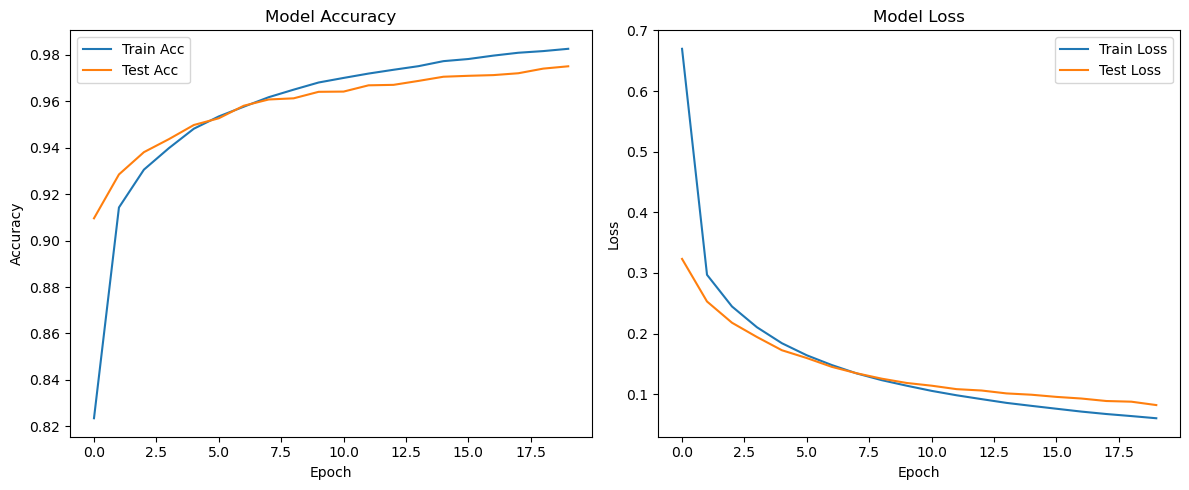

In [6]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Test Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
